# Assignment 03

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 01

### Helper Functions

In [36]:
def mlcg(a, m, seed, N):
    x = seed
    r = []
    for i in range(N):
        x = (a * x) % m
        r.append(x)

    return np.array(r)

def mcinteg(a, m, N, func, seed):
    xrand = mlcg( a, m, seed, N)/m
    sum = 0
    for i in range(N):
        sum += func(xrand[i])
    return 1/ float(N) * sum

def mcinteg_impsamp(a, m, N, func, dist, p, seed):
    # Sample points skewed to the distribution
    xdist = dist(mlcg(a, m, seed, N)/m)
    sum = 0
    for i in range(N):
        sum += func(xdist[i])/p(xdist[i])
    return 1/ float(N) * sum

### Main Code

In [56]:
N = 100000
alpha = np.e/(np.e-1)
f = lambda x : np.exp(-x**2)
p = lambda x : alpha * np.exp(-x)
dist = lambda y : -np.log(1 - y / alpha)
a = 572
m = 16381

without_impsamp = mcinteg(a, m, N, f, 0.2)
with_impsamp = mcinteg_impsamp(a, m, N, f, dist, p, 0.2)

print("The value of the integral without importance sampling is = ",without_impsamp)
print("The value of the integral with importance sampling is = ",with_impsamp)

The value of the integral without importance sampling is =  0.7468844448295607
The value of the integral with importance sampling is =  0.7468195974927665


## Question 02

### Helper Functions

In [49]:
def runge_kutta(dzdx, dydx, x0, y0, z0, xf, h):
    x = [x0]
    y = [y0]
    z = [z0]  # dy/dx

    i = 0
    n = np.ceil((xf - x0) / h)
    while i < n:
        
        k1y = h * dydx(x[i], y[i], z[i])
        k1z = h * dzdx(x[i], y[i], z[i])

        k2y = h * dydx(x[i] + h / 2, y[i] + k1y / 2, z[i] + k1z / 2)
        k2z = h * dzdx(x[i] + h / 2, y[i] + k1y / 2, z[i] + k1z / 2)

        k3y = h * dydx(x[i] + h / 2, y[i] + k2y / 2, z[i] + k2z / 2)
        k3z = h * dzdx(x[i] + h / 2, y[i] + k2y / 2, z[i] + k2z / 2)

        k4y = h * dydx(x[i] + h, y[i] + k3y, z[i] + k3z)
        k4z = h * dzdx(x[i] + h, y[i] + k3y, z[i] + k3z)

        x.append(x[i] + h)
        y.append(y[i] + (k1y + 2 * k2y + 2 * k3y + k4y) / 6)
        z.append(z[i] + (k1z + 2 * k2z + 2 * k3z + k4z) / 6)
        i += 1

    return x, y, z




### Main Code

## Question 03

### Main Code

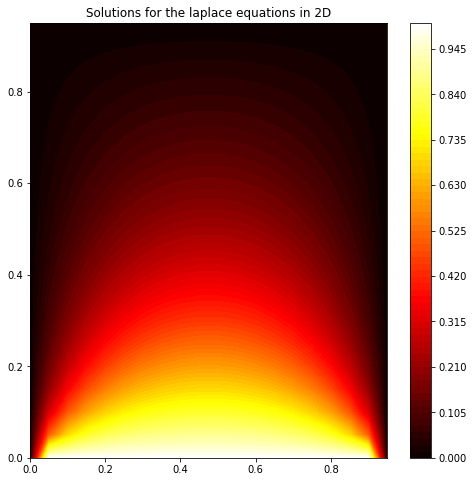

In [71]:
max_iter = 1000

box_lenx = 1
box_leny = 1

h = 0.05

nx = int(box_lenx/h)
ny = int(box_leny/h)


X, Y = np.meshgrid(np.arange(0, box_lenx , h), np.arange(0, box_leny , h), indexing='ij')

phi = np.zeros((nx, ny)) 

#using boundary conditions
phi[:, -1] = 0
phi[:, 0] = 1
phi[0, :] = 0
phi[-1, :] = 0

for iter in range(max_iter):
    phic = phi.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            phi[i, j] = (phic[i + 1, j] + phic[i - 1, j] + phic[i, j + 1] + phic[i, j - 1]) /4

# Contour Plot
cmap = plt.cm.hot
plt.figure(figsize=(8,8))
plt.title("Solutions for the laplace equations in 2D")
plt.contourf(X, Y, phi, 70, cmap=cmap)
plt.colorbar()
plt.savefig("q3_plot.png")
plt.show()